# Basic quantum grammar

A %quantum magic command for evaluating basic quantum circuit calculations using `numpy`.

In [1]:
import quantum

## Quantum states

In [2]:
# Zero
%quantum |0>

|0>

In [3]:
# One
%quantum |1>

|1>

In [4]:
# Plus
%quantum |+>

1/√2 |0> + 1/√2 |1>

In [5]:
import numpy as np
_.view(np.ndarray)

array([[0.70710678],
       [0.70710678]])

In [6]:
# Multiple qubits
%quantum |1010101>

|1010101>

In [7]:
# Superposition
%quantum |+++>

1/√8 |000> + 1/√8 |001> + 1/√8 |010> + 1/√8 |011> + 1/√8 |100> + 1/√8 |101> + 1/√8 |110> + 1/√8 |111>

## Gate operations

In [8]:
# Bell state
%quantum CX01 H0 |00>

1/√2 |00> + 1/√2 |11>

In [9]:
# Bell state, alternative |+> notation
%quantum CX01 |+0>

1/√2 |00> + 1/√2 |11>

In [10]:
# Apply multi-qubit gate
# Index zero starts from left
%quantum X0 X2 X4 |000000>

|101010>

In [11]:
# One-qubit gate sequence
%quantum X0 I0 Y0 H0

[farray([[1/√2, 1/√2],
         [1/√2, -1/√2]]),
 farray([[0.+0.j, 0.+1.j],
         [0.+1.j, 0.+0.j]]),
 farray([[1, 0],
         [0, 1]]),
 farray([[0, 1],
         [1, 0]])]

In [12]:
# Multi-qubit gate
%quantum X0*X1*X2

[farray([[0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 1, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0]])]

In [13]:
# Multi-qubit gate
%quantum X2

[farray([[0, 1, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0, 1, 0]])]


## Variable assignments (wip)

In [14]:
import numpy as np

In [15]:
foo = %quantum |00>
bar = %quantum |11>

In [16]:
baz = (foo + bar) / np.sqrt(2)
baz

1/√2 |00> + 1/√2 |11>

## Plotting

In [17]:
import numpy as np
rho = np.dot(baz, baz.T)
rho

dirac([[1/2, 0, 0, 1/2],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1/2, 0, 0, 1/2]])

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def plot_density_matrix(rho, size_scale=1):
    figsize=tuple(np.array([4,3]) * size_scale)
    fig = plt.figure(figsize=figsize)
    ax1 = fig.add_subplot(111, projection='3d')
    num_qubits = int(np.log2(len(rho)))
    num_elements = 2**num_qubits
    xpos = np.array(list(range(num_elements)) * num_elements)
    ypos = np.array([_n for n in range(num_elements) for _n in [n]*num_elements])
    zpos = np.array([0] * num_elements**2)
    dx = np.ones(num_elements**2)
    dy = np.ones(num_elements**2)
    dz = rho.flatten()
    blue = '#00ceee'
    red = '#ee3300'
    colors = [blue if d >= 0 else red for d in dz]

    ax1.bar3d(xpos, ypos, zpos, dx, dy, np.abs(dz), color=colors)
    plt.xticks(np.arange(num_elements) + .5, [np.binary_repr(n, num_qubits) for n in range(num_elements)])
    plt.yticks(np.arange(num_elements) + .5, [np.binary_repr(n, num_qubits) for n in range(num_elements)])
    plt.title("$\\rho$ density matrix")

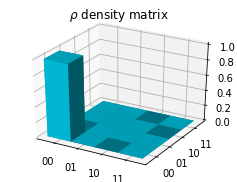

In [19]:
%matplotlib inline
rho = np.dot(foo, foo.T)
plot_density_matrix(rho)

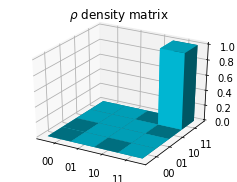

In [20]:
rho = np.dot(bar, bar.T)
plot_density_matrix(rho)

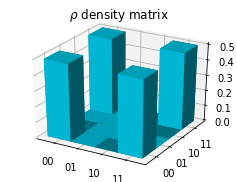

In [21]:
rho = np.dot(baz, baz.T)
plot_density_matrix(rho)

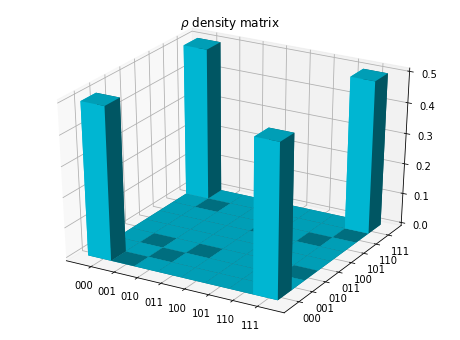

In [22]:
state1 = %quantum |000>
state2 = %quantum |111>
state = (state1 + state2)/np.linalg.norm(state1 + state2)
rho = np.dot(state, state.T)
plot_density_matrix(rho, size_scale=2)

In [23]:
state = %quantum T0 |+>
state

1/√2 |0> + √(0.5j) |1>

## RUS

In [24]:
state = %quantum T0*T1 CNOT21 CNOT102 Z2 TD0*T2 |++0>
state

1/2 |000> + (0.5+0j) |010> + (0.5+0j) |100> + 0.5j |110>

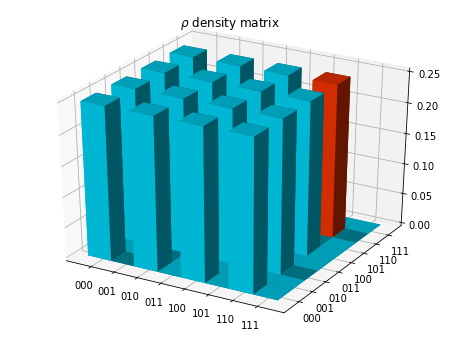

In [25]:
rho = np.dot(state, state.T)
plot_density_matrix(rho, size_scale=2)